In [1]:
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
import re as r
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score ,classification_report
import joblib as j

In [2]:
df=pd.read_csv("PreprocessedDataset.csv")

## Data Overview

In [3]:
df.sample(5)

,Text,Status
16176,Due poor weather conditions I unable go gym la...,happy
20902,please I kind manic right like someone please ...,Suicidal
8515,husband driver ran two college students 3 a.m .,Normal
22290,"To fair , I struggled suicidal thoughts years ...",Suicidal
23251,"feel like live validation , one validate . who...",Suicidal


In [4]:
df["Status"].value_counts()

Status
Depression    6014
Normal        6014
happy         6014
Suicidal      6014
Name: count, dtype: int64

In [5]:
df['Status'].unique()

array(['Depression', 'Normal', 'happy', 'Suicidal'], dtype=object)

In [6]:
df.isna().sum()

Text      0
Status    0
dtype: int64

In [7]:
df = df[df['Status'].notna()]

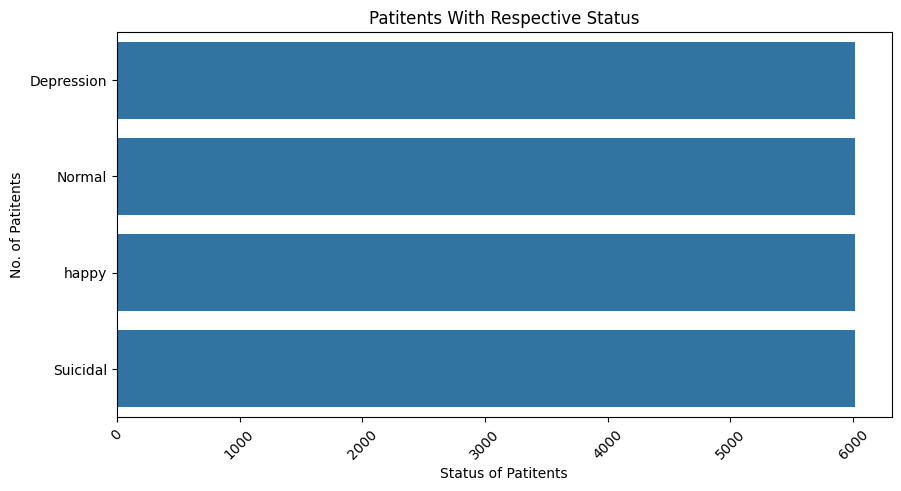

In [8]:
mp.figure(figsize=(10,5))
sns.countplot(df['Status'])
mp.xlabel("Status of Patitents")
mp.ylabel("No. of Patitents")
mp.title("Patitents With Respective Status")
mp.xticks(rotation=45)
mp.show()

In [9]:
df.shape

(24056, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24056 entries, 0 to 24055
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    24056 non-null  object
 1   Status  24056 non-null  object
dtypes: object(2)
memory usage: 376.0+ KB


In [11]:
df.duplicated().sum()

9399

## Model Training usinf TFIDF and BOW on Multinomial

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import FeatureUnion

# Load your dataset (assuming it's a CSV file)
#df = pd.read_csv('your_dataset.csv')

# Split the data into training and testing sets
X=df['Text']
y=df['Status']  # emotion labels (e.g., happy, sad, angry, etc.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with a maximum document frequency of 0.7
tfidf_vectorizer = TfidfVectorizer(max_df=0.7)

# Create a BoW vectorizer with a maximum feature count of 5000
bow_vectorizer = CountVectorizer(max_features=5000)

# Combine the TF-IDF and BoW vectorizers using a FeatureUnion
vectorizer = FeatureUnion([
    ('tfidf', tfidf_vectorizer),
    ('bow', bow_vectorizer)
])

# Fit the combined vectorizer to the training data and transform both the training and testing data
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier on the combined features
clf1 = MultinomialNB()
clf1.fit(X_train_features, y_train)

# Define a prediction function using the trained classifier
def predict_emotion(text):
    # Convert the input text to a combined feature vector
    text_features = vectorizer.transform([text])
    # Predict the emotion using the trained classifier
    emotion_pred = clf1.predict(text_features)[0]
    return emotion_pred

# Test the prediction function
text_example = "It is so frustrating that I have not received the amazon package. I have been waiting for weeks and it has still not arrived!"

emotion_pred = predict_emotion(text_example)
print(f"Predicted emotion: {emotion_pred}")

# Evaluate the model on the testing data
y_pred = clf1.predict(X_test_features)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Predicted emotion: Depression
Accuracy: 0.7817955112219451
Classification Report:
              precision    recall  f1-score   support

  Depression       0.67      0.73      0.70      1208
      Normal       0.98      0.71      0.82      1215
    Suicidal       0.66      0.78      0.71      1191
       happy       0.90      0.91      0.91      1198

    accuracy                           0.78      4812
   macro avg       0.80      0.78      0.79      4812
weighted avg       0.80      0.78      0.79      4812

Confusion Matrix:
[[ 879    3  320    6]
 [ 105  864  131  115]
 [ 254    9  925    3]
 [  66    7   31 1094]]


## Data Splitting and Vectorization for Bag of Words

In [13]:
x=df['Text']
y=df['Status']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(19244,) (19244,) (4812,) (4812,)


In [17]:
vec=CountVectorizer()
x_train_bow=vec.fit_transform(x_train)
x_test_bow=vec.transform(x_test)

In [18]:
print(x_train_bow.shape,x_test_bow.shape)

(19244, 25494) (4812, 25494)


In [19]:
#print(x_test_tfidf)
#print(x_train_tfidf)

## Model Training using MultiNomial NB on BOW Features

In [20]:
# Train a Multinomial Naive Bayes classifier on the BoW features
clf = MultinomialNB()
clf.fit(x_train_bow, y_train)

MultinomialNB()

In [21]:
# Evaluate the model on the testing data
y_pred = clf.predict(x_test_bow)
ytr_pred = clf.predict(x_train_bow)
print("Test accuracy: ",accuracy_score(y_test,y_pred))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred))
print("Precision Test accuracy: ",precision_score(y_test,y_pred,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy:  0.7749376558603491
Train accuracy:  0.8469652878819373
Precision Test accuracy:  0.8004545535944438
Precision Train accuracy:  0.8608353580898738
Recall: 0.7749376558603491
Classification Report:
               precision    recall  f1-score   support

  Depression       0.66      0.72      0.69      1208
      Normal       0.97      0.67      0.79      1215
    Suicidal       0.66      0.82      0.73      1191
       happy       0.90      0.90      0.90      1198

    accuracy                           0.77      4812
   macro avg       0.80      0.78      0.78      4812
weighted avg       0.80      0.77      0.78      4812



In [22]:
j.dump(vec,'vectorizer.pkl')
j.dump(clf,'model.pkl')

['model.pkl']

In [23]:
vector=j.load('vectorizer.pkl')
model=j.load('model.pkl')

## Testing on Model Trained

In [24]:
text="It is so frustrating that I have not received the amazon package. I have been waiting for weeks and it has still not arrived!"

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
pt=PorterStemmer()
def preprocessing(text):
    example_sent = text
    #print(example_sent)
    example_sent = example_sent.replace(r'[^\w\s]+,', '')
    stop_words = set(stopwords.words('english'))
    list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im', 'its','yesterday'}
    stop_words.update(list_contractions_common)

    word_tokens = word_tokenize(example_sent)

    #print(word_tokens)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []


    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    filtered_sentence = ' '.join(filtered_sentence)
    #print(filtered_sentence)
    final_sentence = filtered_sentence
    #filtered_sentence = TextBlob(filtered_sentence)
    #filtered_sentence = str(filtered_sentence.correct())
    return filtered_sentence 

In [26]:
text=preprocessing(text)

In [27]:
def predi(x):
    vec=vector.transform([text])
    result=model.predict(vec)[0]
    return result

In [28]:
predi(text)

'happy'

## More Testing on different sentences

In [14]:
s = "noone is talking to me i feel bored."
s1 = "Today was a very hard day for me because 3 days ago I lost my dad forever. And then 3 days later my mom is admitted into the hospital. My two biggest supporters are going away from me in just a few days"
s2 = "Two days ago, I was sitting in my living room. And it was raining. I personally don't like rain because when it rains everything gets wet and I hate looking at wet things. Also, a clean freak. So like when it rains my family members come from outside and they have dirt in their shoes and make the whole house dirty."
s3 = "Wow! I just landed my first internship today! Yay! I had a call with the recruiter and we finalized some details. I can't believe it!"
s4 = "Tomorrow is my mom's birthday and I planned a surprise party for her. I bought her favorite cake, snacks, and invited close friends and family! I can't wait to see her expression!"
s5  ="I am so stressed. I have three exams, 2 essays, one project, and a club proposal to submit all by the end of this week."
s6 = "Today was a very hard day for me because I was really feeling homesick, and I was missing my family and friends. I miss all our times together."
s7 = "It is so frustrating that I have not received the amazon package I ordered which had the gift for my friend's birthday. I have been waiting for weeks and it has still not arrived!"
s8 = "I forgot my friend's birthday, and I feel really bad now. How could I do this?"
s9 = "I lost my car keys, and I have been searching for hours and I still can't find them. I hate this!"
s10 = "I got so much work done today, and I feel really relieved so now I don't have to worry about much for some time."
s11 = "I went for a walk with a friend to a boba shop, but it was closed, so that was disappointing. Oh well...maybe next time."

In [15]:
list=[s,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11]
print(list)

['noone is talking to me i feel bored.', 'Today was a very hard day for me because 3 days ago I lost my dad forever. And then 3 days later my mom is admitted into the hospital. My two biggest supporters are going away from me in just a few days', "Two days ago, I was sitting in my living room. And it was raining. I personally don't like rain because when it rains everything gets wet and I hate looking at wet things. Also, a clean freak. So like when it rains my family members come from outside and they have dirt in their shoes and make the whole house dirty.", "Wow! I just landed my first internship today! Yay! I had a call with the recruiter and we finalized some details. I can't believe it!", "Tomorrow is my mom's birthday and I planned a surprise party for her. I bought her favorite cake, snacks, and invited close friends and family! I can't wait to see her expression!", 'I am so stressed. I have three exams, 2 essays, one project, and a club proposal to submit all by the end of thi

In [18]:
for text in list:
    print(text)
    text=preprocessing(text)
    print("Words:", text)
    sentiment = predict_emotion(text)
    print("Sentiment:", sentiment)

noone is talking to me i feel bored.
Words: noone talking feel bored .
Sentiment: Depression
Today was a very hard day for me because 3 days ago I lost my dad forever. And then 3 days later my mom is admitted into the hospital. My two biggest supporters are going away from me in just a few days
Words: Today hard day 3 days ago I lost dad forever . And 3 days later mom admitted hospital . My two biggest supporters going away days
Sentiment: Suicidal
Two days ago, I was sitting in my living room. And it was raining. I personally don't like rain because when it rains everything gets wet and I hate looking at wet things. Also, a clean freak. So like when it rains my family members come from outside and they have dirt in their shoes and make the whole house dirty.
Words: Two days ago , I sitting living room . And raining . I personally n't like rain rains everything gets wet I hate looking wet things . Also , clean freak . So like rains family members come outside dirt shoes make whole hous